<a href="https://colab.research.google.com/github/bonthalaakshith/bonthalaakshith/blob/main/Copy_of_Untitled17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 200)               157000    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 178110 (695.74 KB)
Trainable params: 178110 (695.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/60
1688/1688 [==============================] - 9s 5ms/step - loss: 0.6499 - accuracy: 0.8311 - val_loss: 0.3168 - val_accuracy: 0.9153
Ep

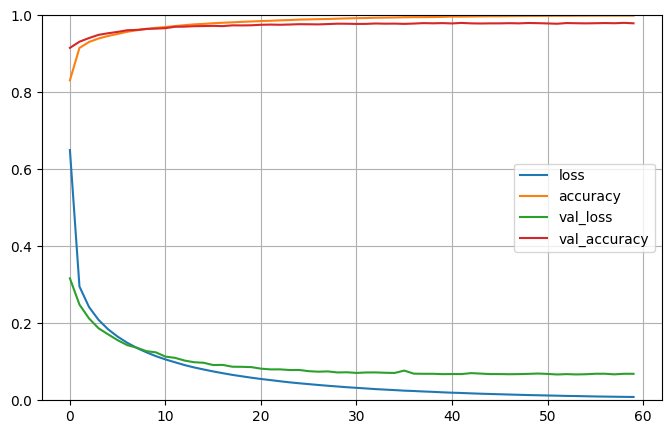

313/313 [==============================] - 1s 2ms/step
AxesImage(size=(28, 28))


'7 - Seven'

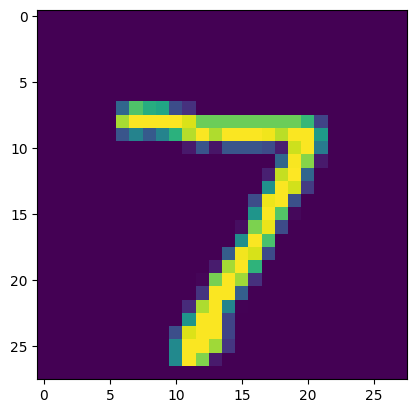

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

digit_mnist = keras.datasets.mnist
(X_train_full,y_train_full) , (X_test,y_test) = digit_mnist.load_data()

class_names = ["0 - Zero" , "1 - One" , "2 - Two" , "3 - Three" , "4 - Four" , "5 - Five" , "6 - Six" , "7 - Seven" , "8 - Eight", "9 - Nine"]

X_train_n = X_train_full / 255.0
X_test_n = X_test / 255.0

X_valid , X_train = X_train_n[:6000] , X_train_n[6000:]
y_valid , y_train = y_train_full[:6000] , y_train_full[6000:]
X_test = X_test_n

np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(200, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

model.summary()

import pydot
keras.utils.plot_model(model)

model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd" ,
             metrics = ["accuracy"])

model_history = model.fit(X_train, y_train, epochs=60,
                         validation_data = (X_valid,y_valid))

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

model.evaluate(X_test, y_test)

X_new = X_test[:3]

y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred

print(plt.imshow(X_test[0]))
np.array(class_names)[y_pred][0]